In [1]:
import os
import sys
from datetime import datetime
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import importlib
import math
import json
import matplotlib.patches as patches

##
matplotlib.rcParams['pdf.fonttype'] = 42

## Helpful locations which are assumed to already exist
work_dir = f"/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Yuanyuan/Project/BGa/results/fig2" 
data_dir = f"/allen/programs/celltypes/workgroups/rnaseqanalysis/hct_ux3_cellxgene/anndata_080/BasalGanglia/Astro"
os.chdir(work_dir)


/home/yuanyuan.fu/bin/miniconda3/envs/iterative_scANVI_May9/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/yuanyuan.fu/bin/miniconda3/envs/iterative_scANVI_May9/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/yuanyuan.fu/bin/miniconda3/envs/iterative_scANVI_May9/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/yuanyuan.fu/bin/miniconda3/envs/iterative_scANVI_May9/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/

In [2]:
adata_21 = sc.read_h5ad(data_dir + "/HMBA_human_Astro_preprint_21clusters.h5ad")
adata_21

AnnData object with n_obs × n_vars = 136684 × 36601
    obs: 'Neighborhood', 'Class', 'Subclass', 'Group', 'Cluster', 'cluster_id', 'cell_type_ontology_term', 'load_id', 'donor_id', 'assay', 'assay_ontology_term_id', 'organism', 'organism_ontology_term_id', 'development_stage', 'anatomical_region', 'anatomical_region_merged', 'anatomical_region_ontology_term_id', 'brain_region_ontology_term_id', 'self_reported_sex', 'self_reported_sex_ontology_term_id', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'disease', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'atac_confidently_mapped_read_pairs', 'atac_fraction_of_genome_in_peaks', 'atac_fraction_of_high_quality_fragments_in_cells', 'atac_fraction_of_high_quality_fragments_overlapping_tss', 'atac_fraction_of_high_quality_fragments_overlapping_peaks', 'atac_fraction_of_transposition_events_in_peaks_in_cells', 'atac_mean_raw_read_pairs_per_cell', 'atac_median_high_quality_fragments_per_cell', 'atac

In [3]:
adata = adata_21[adata_21.obs['subGroup'] != "mixed"].copy()
adata.write(data_dir + "/HMBA_human_Astro_preprint_19clusters.h5ad")

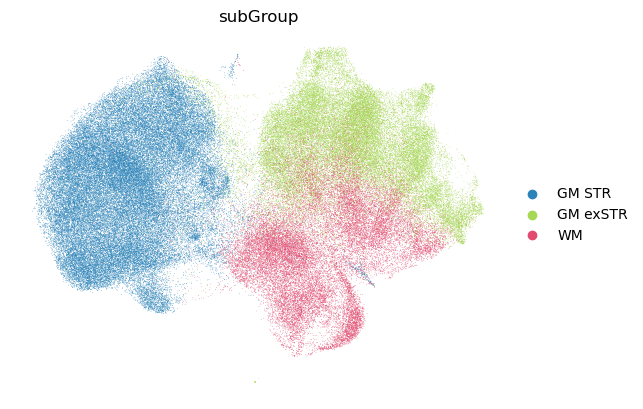

                             subGroup cluster
CACTAAGGTCATGCCC-2362_A05      GM STR     h-7
AAACAGCCATTGTGGC-2362_A05      GM STR    h-14
GATCGAGCATGATTGT-2349_C08      GM STR    h-31
AACCGCTCAATATAGG-2362_A05    GM exSTR   h-145
AGGATGCAGGTTAGCT-2362_A05    GM exSTR   h-150
GATCAGGCACAATGCC-2362_A05    GM exSTR   h-149
GTCTCACTCCCTGGTT-2433_1_G04  GM exSTR   h-146
AAAGCGGGTCATCATC-2362_A05    GM exSTR   h-160
TCACCGGCAGGCTTCG-2362_A05    GM exSTR   h-450
AATTAGCGTGAACAAA-2362_A05    GM exSTR   h-452
GCAAGTGCAAACCTTG-2370_B03    GM exSTR   h-152
AAACATGCAGTAGGAT-2362_A05    GM exSTR   h-159
AGCTACTAGGCGCACT-2362_A05          WM   h-472
TACTGGCCACTGACCG-2346_B06          WM   h-479
ACGGTTTAGGCGGATG-2362_A05          WM   h-485
CAGCCTAAGTATTGGC-2386_A02          WM   h-230
AGTAAGTAGCACCACA-2362_A05          WM   h-231
AAAGCCGCACCTAATG-2362_A05          WM    h-28
AACCTAATCCTCACAC-2362_A05          WM   h-227


In [4]:
sc.pl.embedding(
    adata,
    use_raw=False,
    basis="X_umap",
    color=['subGroup'],
    frameon=False,
    ncols=1
)


mapping = (
    adata.obs[['subGroup', 'cluster']]
    .drop_duplicates()
    .sort_values(['subGroup', 'cluster'])
)

print(mapping)

In [6]:
adata

AnnData object with n_obs × n_vars = 134124 × 36601
    obs: 'Neighborhood', 'Class', 'Subclass', 'Group', 'Cluster', 'cluster_id', 'cell_type_ontology_term', 'load_id', 'donor_id', 'assay', 'assay_ontology_term_id', 'organism', 'organism_ontology_term_id', 'development_stage', 'anatomical_region', 'anatomical_region_merged', 'anatomical_region_ontology_term_id', 'brain_region_ontology_term_id', 'self_reported_sex', 'self_reported_sex_ontology_term_id', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'disease', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'atac_confidently_mapped_read_pairs', 'atac_fraction_of_genome_in_peaks', 'atac_fraction_of_high_quality_fragments_in_cells', 'atac_fraction_of_high_quality_fragments_overlapping_tss', 'atac_fraction_of_high_quality_fragments_overlapping_peaks', 'atac_fraction_of_transposition_events_in_peaks_in_cells', 'atac_mean_raw_read_pairs_per_cell', 'atac_median_high_quality_fragments_per_cell', 'atac

### DEGs of 3subGroups

In [5]:
sc.tl.rank_genes_groups(adata, "subGroup", method="wilcoxon", corr_method = "benjamini-hochberg", pts=True, 
                        use_raw=False, reference="rest", key_added="subGroup") #https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.rank_genes_groups.html


print(adata.uns["subGroup"]["names"].dtype.names)
all_groups = adata.uns["subGroup"]["names"].dtype.names

df_all = pd.concat([
    sc.get.rank_genes_groups_df(adata, group=grp, key='subGroup').assign(group=grp)
    for grp in all_groups
])

display(df_all.head(30))
df_all.to_csv(work_dir + "/rank_genes_groups_3subGroups_DEG.csv", index=False)

('GM STR', 'GM exSTR', 'WM')


,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference,group
0,ADGRV1,290.397430,7.502348,0.0,0.0,0.997729,0.467738,GM STR
1,GRM3,283.811707,8.775542,0.0,0.0,0.937123,0.148225,GM STR
2,SLC1A2,266.467346,3.066569,0.0,0.0,0.998841,0.920993,GM STR
3,NRXN1,248.626511,2.413312,0.0,0.0,0.999608,0.912072,GM STR
4,PREX2,240.801559,2.420292,0.0,0.0,0.993703,0.889166,GM STR
5,TMEM132C,239.308640,8.994793,0.0,0.0,0.776015,0.037960,GM STR
6,SLC8A1,229.932434,6.298191,0.0,0.0,0.873228,0.263484,GM STR
7,CADM1,229.790588,2.411677,0.0,0.0,0.993672,0.882635,GM STR
8,WIF1,228.835541,9.558947,0.0,0.0,0.734065,0.019834,GM STR
9,EPHA6,228.689346,6.210148,0.0,0.0,0.897461,0.319286,GM STR


### Heatmap overview

In [2]:
adata = sc.read_h5ad(data_dir + "/HMBA_human_Astro_preprint_19clusters.h5ad")

In [3]:
df_deg = pd.read_csv(work_dir + "/rank_genes_groups_3subGroups_DEG.csv", index_col=False)

#### filtering DEGs (considering min_fractions) to show Figure 2A, 2B

(115, 8)
Marker gene lists saved by subGroup.


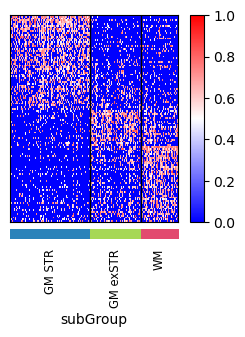

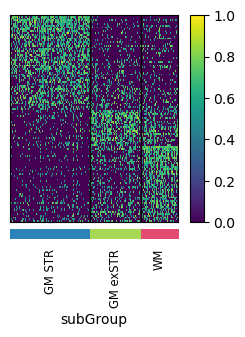

group
GM STR      53
GM exSTR    20
WM          42
Name: names, dtype: int64


In [4]:
markers_df = df_deg[
    (df_deg['pvals_adj'] < 0.01) &                 
    (df_deg['logfoldchanges'] > 1) &  # .abs() 
    (df_deg['pct_nz_group'] > 0.4)  &  # >0.2
    (df_deg['pct_nz_reference'] < 0.25) # <0.2
]
print(markers_df.shape)

# Group marker genes by subGroup and save each list as a separate txt file
grouped = markers_df.groupby('group')['names']

for group, gene_series in grouped:
    gene_list = gene_series.unique()
    file_path = os.path.join(work_dir, f"marker_genes_{group.replace(' ', '_')}.txt")
    with open(file_path, 'w') as f:
        for gene in gene_list:
            f.write(f"{gene}\n")

print("Marker gene lists saved by subGroup.")

marker_genes = markers_df['names'].tolist()
matplotlib.rcParams['pdf.fonttype'] = 42

sc.pl.heatmap(adata, 
              marker_genes, 
              groupby='subGroup', 
              standard_scale='var',
              cmap='bwr',
              use_raw=False, 
              swap_axes=True,
              figsize=(2.5, 3),             
              save="astro_marker_heatmap.pdf" 
) 

sc.pl.heatmap(adata, 
              marker_genes, 
              groupby='subGroup', 
              standard_scale='var',
            #  cmap='bwr',
              use_raw=False, 
              swap_axes=True,
              figsize=(2.5, 3),             
              #save="astro_marker_heatmap2.pdf" 
) 

print(markers_df.groupby('group')['names'].nunique())

In [5]:
marker_genes

['GRM3',
 'TMEM132C',
 'WIF1',
 'ADAMTS17',
 'RERG',
 'OAF',
 'TMEM132B',
 'CACNA1A',
 'EPHA4',
 'LUCAT1',
 'AKAP12',
 'AC068308.1',
 'PRDM16-DT',
 'EMX2OS',
 'CHRDL1',
 'NRP1',
 'KBTBD12',
 'BICC1',
 'SEL1L3',
 'AC009879.4',
 'AL137009.1',
 'LHX2',
 'CSPG5',
 'BMPER',
 'PLAGL1',
 'MFGE8',
 'LINC02328',
 'SLIT1',
 'AC008957.2',
 'FOXG1',
 'EMX2',
 'GNA14-AS1',
 'GALNT16',
 'UNC5C',
 'GFRA1',
 'KCNQ3',
 'FOXG1-AS1',
 'AL445259.1',
 'PDE10A',
 'AL356737.2',
 'GPC5-AS2',
 'AC107398.3',
 'NID1',
 'P2RY14',
 'HDDC2',
 'SCG3',
 'MKRN3',
 'PARVA',
 'TRDMT1',
 'LINC02406',
 'SALL3',
 'COL11A1',
 'AC131571.1',
 'KIAA1217',
 'STK32A',
 'SH3GL2',
 'SHISA6',
 'TNR',
 'ADCY1',
 'GMPR',
 'GHR',
 'LUZP2',
 'DEC1',
 'SPARC',
 'NR2F2-AS1',
 'CDH23',
 'SLC24A4',
 'AC117464.1',
 'PTPRJ',
 'GALNT13',
 'SRPX',
 'ADAM12',
 'GADD45B',
 'ADAMTSL3',
 'CD44',
 'COL21A1',
 'SLC38A1',
 'CCDC85A',
 'RTN1',
 'KCNJ3',
 'GALNT15',
 'LINC00836',
 'AL627316.1',
 'CPAMD8',
 'STXBP5L',
 'KCNN2',
 'MAN1C1',
 'C8orf34',
 '

#### DotPlot showing markers (TFs bold)

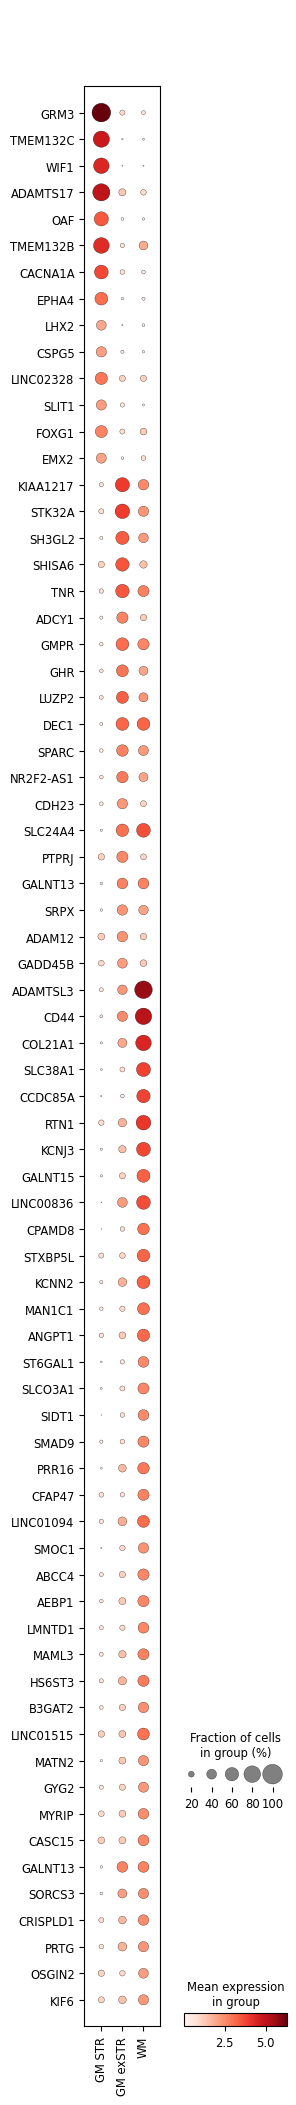

In [9]:
markers =['GRM3', 'TMEM132C', 'WIF1', 'ADAMTS17', 'OAF', 'TMEM132B', 'CACNA1A', 'EPHA4', 'LHX2', 'CSPG5', 'LINC02328', 'SLIT1', 'FOXG1', 'EMX2', 'KIAA1217', 'STK32A',
          'SH3GL2', 'SHISA6', 'TNR', 'ADCY1', 'GMPR', 'GHR', 'LUZP2', 'DEC1', 'SPARC', 'NR2F2-AS1', 'CDH23', 'SLC24A4', 'PTPRJ', 'GALNT13', 'SRPX', 'ADAM12', 'GADD45B', 
          'ADAMTSL3', 'CD44', 'COL21A1', 'SLC38A1', 'CCDC85A', 'RTN1', 'KCNJ3', 'GALNT15', 'LINC00836', 'CPAMD8', 'STXBP5L', 'KCNN2', 'MAN1C1', 'ANGPT1', 'ST6GAL1', 'SLCO3A1', 
          'SIDT1', 'SMAD9', 'PRR16', 'CFAP47', 'LINC01094', 'SMOC1', 'ABCC4', 'AEBP1', 'LMNTD1', 'MAML3', 'HS6ST3', 'B3GAT2', 'LINC01515', 'MATN2', 'GYG2', 'MYRIP', 'CASC15', 'GALNT13',
          'SORCS3', 'CRISPLD1', 'PRTG', 'OSGIN2', 'KIF6']

sc.pl.dotplot(
    adata,
    var_names=markers, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'None',#'var',#'None',  
    swap_axes=True,
  #  figsize=(2.5,3.5),
  #  save="Dotplot_Astro_Markers.pdf"
)


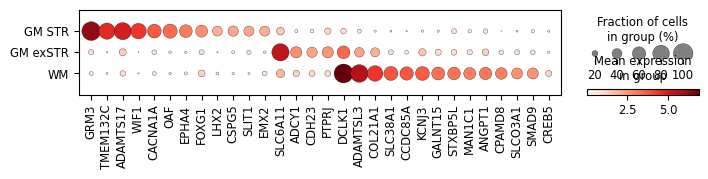

In [12]:
markers =['GRM3', 'TMEM132C', 'ADAMTS17', 'WIF1', 'CACNA1A', 'OAF', 'EPHA4', 'FOXG1', 'LHX2', 'CSPG5', 'SLIT1', 'EMX2', # GM STR
          'SLC6A11', 'ADCY1', 'CDH23', 'PTPRJ', # GM exSTR
          'DCLK1', 'ADAMTSL3', 'COL21A1', 'SLC38A1', 'CCDC85A', 'KCNJ3', 'GALNT15', 'STXBP5L', 'MAN1C1', 'ANGPT1','CPAMD8', 'SLCO3A1', 'SMAD9', 'CREB5', # WM 
          ]

sc.pl.dotplot(
    adata,
    var_names=markers, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'None',#'var',#'None',  
    swap_axes=False,
    figsize=(8, 1.1),
    save="Dotplot_Astro_Markers.pdf"
)


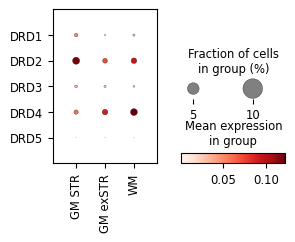

In [9]:
markers =['DRD1', 'DRD2', 'DRD3', 'DRD4', 'DRD5']

sc.pl.dotplot(
    adata,
    var_names=markers, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'None',#'var',#'None',  
    swap_axes=True,
    figsize=(3, 2),
    save="Dotplot_Astro_DopaReceptors.pdf"
)


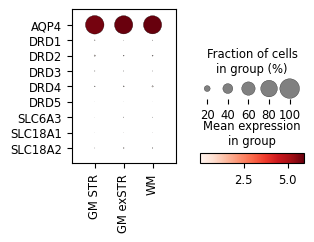

In [8]:
markers =['AQP4', 'DRD1', 'DRD2', 'DRD3', 'DRD4', 'DRD5', 'SLC6A3', 'SLC18A1', 'SLC18A2']

sc.pl.dotplot(
    adata,
    var_names=markers, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'None',#'var',#'None',  
    swap_axes=True,
    figsize=(3, 2),
    save="Dotplot_Astro_DopaReceptors.pdf"
)


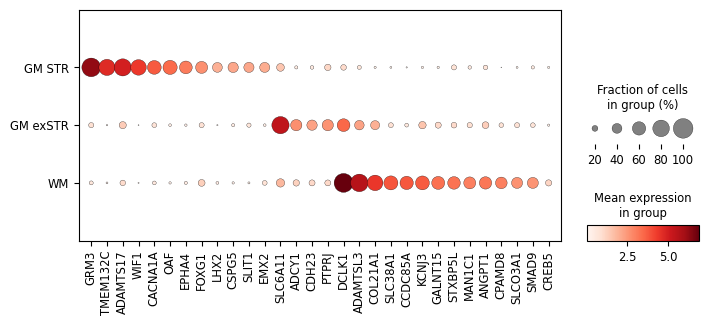

In [13]:
sc.pl.dotplot(
    adata,
    var_names=markers, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'None',#'var',#'None',  
    swap_axes=False,
    figsize=(8, 3),
    save="Dotplot_Astro_Markers222_withcolorBar.pdf"
)


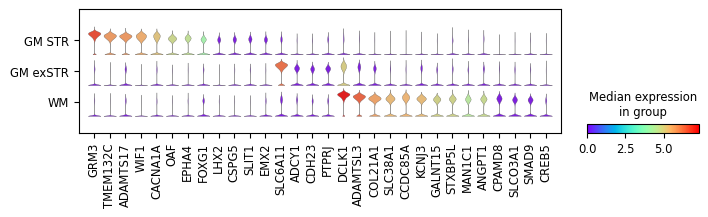

In [14]:
sc.pl.stacked_violin(
    adata, 
    markers, 
    groupby='subGroup', 
    use_raw=False, 
    swap_axes=False, 
    figsize=(8,1.6),
    cmap='rainbow', #Blues
    dendrogram=False,
    save="Violinplot_of_AstroMarkers_fig2.pdf"
)

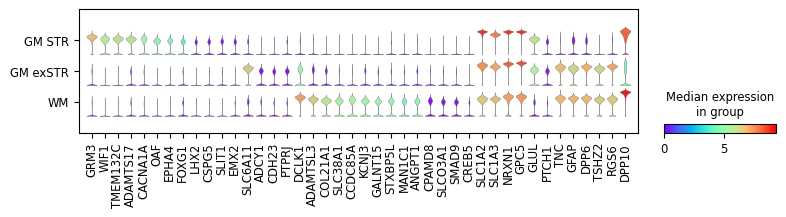

In [3]:
markers =['GRM3', 'WIF1', 'TMEM132C', 'ADAMTS17', 'CACNA1A', 'OAF', 'EPHA4', 'FOXG1', 'LHX2', 'CSPG5', 'SLIT1', 'EMX2', # GM STR
          'SLC6A11', 'ADCY1', 'CDH23', 'PTPRJ', # GM exSTR
          'DCLK1', 'ADAMTSL3', 'COL21A1', 'SLC38A1', 'CCDC85A', 'KCNJ3', 'GALNT15', 'STXBP5L', 'MAN1C1', 'ANGPT1','CPAMD8', 'SLCO3A1', 'SMAD9', 'CREB5', # WM 
          'SLC1A2', 'SLC1A3', 'NRXN1', 'GPC5', 'GLUL','PTCH1',  # GM 
          'TNC', 'GFAP', 'DPP6', 'TSHZ2', 'RGS6', # GM exSTR + WM
          'DPP10']

sc.pl.stacked_violin(
    adata, 
    markers, 
    groupby='subGroup', 
    use_raw=False, 
    swap_axes=False, 
    figsize=(9,1.6),
    cmap='rainbow', #Blues
    dendrogram=False,
    save="Violinplot_of_AstroMarkers_wBridge_fig2.pdf"
)

In [15]:
adata

AnnData object with n_obs × n_vars = 134124 × 36601
    obs: 'Neighborhood', 'Class', 'Subclass', 'Group', 'Cluster', 'cluster_id', 'cell_type_ontology_term', 'load_id', 'donor_id', 'assay', 'assay_ontology_term_id', 'organism', 'organism_ontology_term_id', 'development_stage', 'anatomical_region', 'anatomical_region_merged', 'anatomical_region_ontology_term_id', 'brain_region_ontology_term_id', 'self_reported_sex', 'self_reported_sex_ontology_term_id', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'disease', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'atac_confidently_mapped_read_pairs', 'atac_fraction_of_genome_in_peaks', 'atac_fraction_of_high_quality_fragments_in_cells', 'atac_fraction_of_high_quality_fragments_overlapping_tss', 'atac_fraction_of_high_quality_fragments_overlapping_peaks', 'atac_fraction_of_transposition_events_in_peaks_in_cells', 'atac_mean_raw_read_pairs_per_cell', 'atac_median_high_quality_fragments_per_cell', 'atac

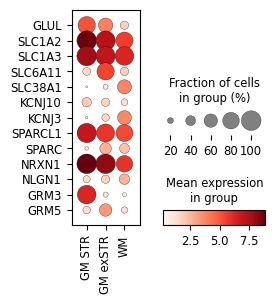

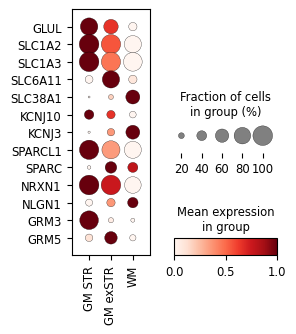

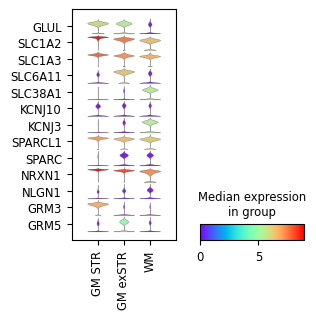

In [16]:
function_markers =['GLUL', 'SLC1A2', 'SLC1A3', 'SLC6A11', 'SLC38A1', # neurotransmitter
          'KCNJ10', 'KCNJ3', # K+ channel
          'SPARCL1','SPARC' , # molecules secreted
          'NRXN1', 'NLGN1', #cell adhension
          'GRM3', 'GRM5'
          ]


sc.pl.dotplot(
    adata,
    var_names=function_markers, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'None',#'var',#'None',  
    swap_axes=True,
    figsize=(2.5,2.8),
   # save="Dotplot_Astro_Markers.pdf"
)

sc.pl.dotplot(
    adata,
    var_names=function_markers, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'var',#'var',#'None',  
    swap_axes=True,
    figsize=(2.65,3.2),
    save="Dotplot_of_Astro2Func_fig2Supp.pdf"
)

sc.pl.stacked_violin(
    adata, 
    function_markers, 
    groupby='subGroup', 
    use_raw=False, 
    swap_axes=True, 
    figsize=(3,3),
    cmap='rainbow', #Blues
    dendrogram=False,
    save="Violinplot_of_Astro2subFunc_fig2Supp.pdf"
)

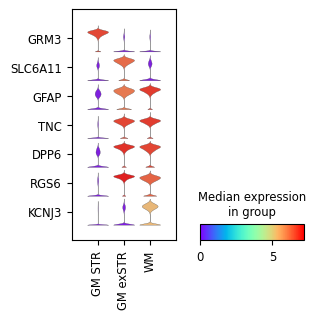

In [10]:
markers2= ['GRM3' , 'SLC6A11', 'GFAP', 'TNC', 'DPP6', 'RGS6', 'KCNJ3']
sc.pl.stacked_violin(
    adata, 
    markers2, 
    groupby='subGroup', 
    use_raw=False, 
    swap_axes=True, 
    figsize=(3,3),
    cmap='rainbow', #Blues
    dendrogram=False,
    save="Violinplot_of_Astro2bridgeMarkers_fig2J.pdf"
)

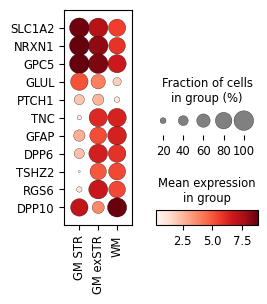

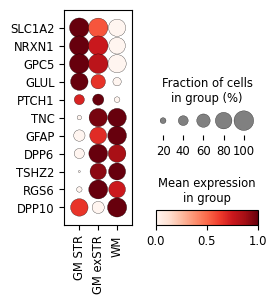

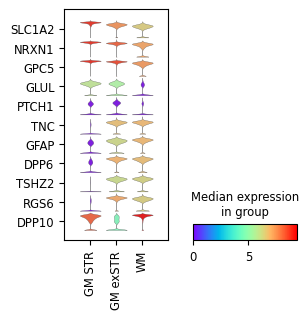

In [17]:
mar2subgroups = ['SLC1A2', 'NRXN1', 'GPC5', 'GLUL','PTCH1',  # GM #
                 'TNC', 'GFAP', 'DPP6', 'TSHZ2', 'RGS6', # GM exSTR + WM
                 'DPP10'] # GM STR + WM

sc.pl.dotplot(
    adata,
    var_names=mar2subgroups, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'None',#'var',#'None',  
    swap_axes=True,
    figsize=(2.5,2.8),
  #  save="Dotplot_Astro_Markers.pdf"
)

sc.pl.dotplot(
    adata,
    var_names=mar2subgroups, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'var',#'var',#'None',  
    swap_axes=True,
    figsize=(2.5,2.8),
    save="Dotplot_of_Astro2subGroups_fig2.pdf"
)


sc.pl.stacked_violin(
    adata, 
    mar2subgroups, 
    groupby='subGroup', 
    use_raw=False, 
    swap_axes=True, 
    figsize=(3,3),
    cmap='rainbow', #Blues
    dendrogram=False,
    save="Violinplot_of_Astro2subGroups_fig2.pdf"
)

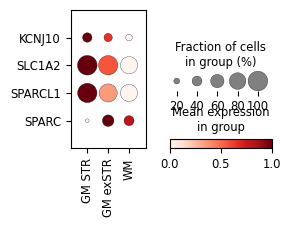

In [6]:
mar2subgroups = ['KCNJ10', 'SLC1A2', 'SPARCL1', 'SPARC'] # GM STR + WM

sc.pl.dotplot(
    adata,
    var_names=mar2subgroups, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'var',#'var',#'None',  
    swap_axes=True,
    figsize=(2.6,1.8),
    save="Dotplot_of_Astro2subGroups1_fig2.pdf"
)

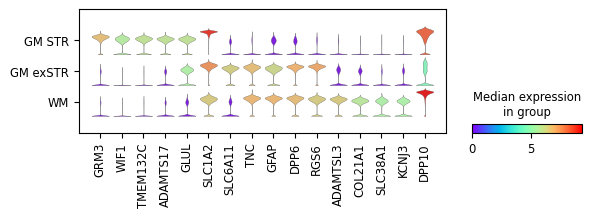

In [10]:
#markersnew =['GRM3', 'TMEM132C', 'ADAMTS17', 'WIF1', #'CACNA1A', 'OAF', 'EPHA4', 'FOXG1', 'LHX2', 'CSPG5', 'SLIT1', 'EMX2', # GM STR
#          'SLC6A11', 'ADCY1', 'CDH23', 'PTPRJ', # GM exSTR
#          'ADAMTSL3', 'COL21A1', 'SLC38A1', 'CCDC85A', 'KCNJ3', #'DCLK1', 'GALNT15', 'STXBP5L', 'MAN1C1', 'ANGPT1','CPAMD8', 'SLCO3A1', 'SMAD9', 'CREB5', # WM 
#          'SLC1A2', 'NRXN1', 'GPC5', 'GLUL','PTCH1',  # GM #
#          'TNC', 'GFAP', 'DPP6', 'TSHZ2', 'RGS6', # GM exSTR + WM
#          'DPP10' # GM STR + WM
#          ]

markersnew =[
             'GRM3', 'WIF1', 'TMEM132C', 'ADAMTS17',
             'GLUL', 'SLC1A2', #'PTCH1',
             'SLC6A11', #'CDH23',
             'TNC', 'GFAP', 'DPP6', 'RGS6', #'TSHZ2',
             'ADAMTSL3', 'COL21A1', 'SLC38A1', 'KCNJ3', 
             'DPP10',
            ]

sc.pl.stacked_violin(
    adata, 
    markersnew, 
    groupby='subGroup', 
    use_raw=False, 
    swap_axes=False, 
    figsize=(6.5,1.6),
    cmap='rainbow', #Blues
    dendrogram=False,
    save="Violinplot_of_AstroMarkers_fig2.pdf"
)

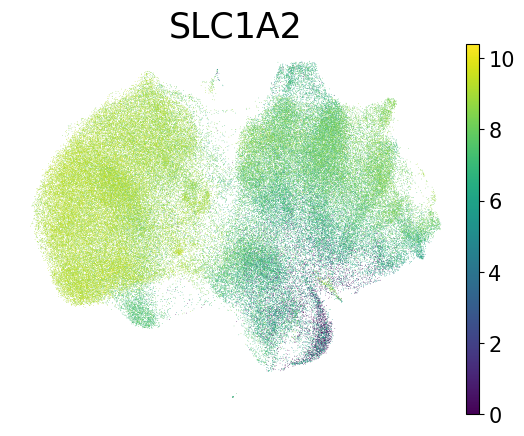

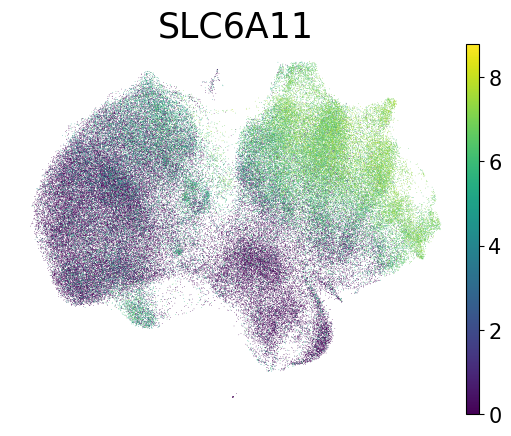

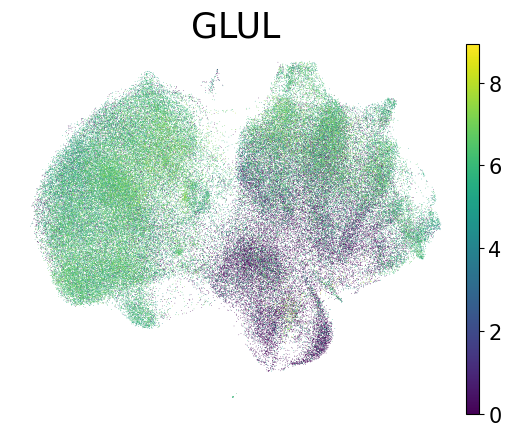

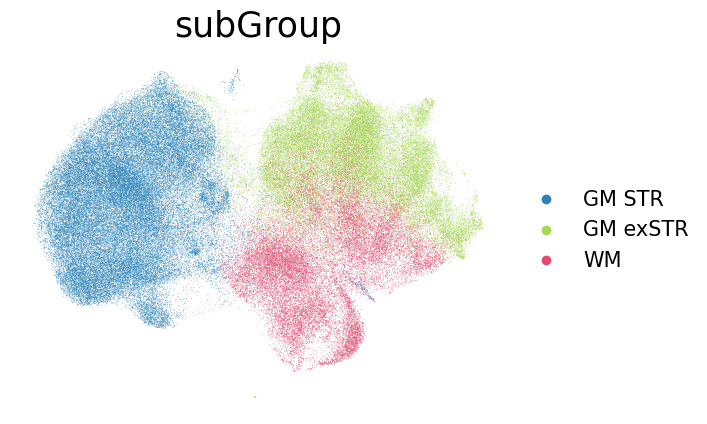

In [18]:
import matplotlib as mpl

#mpl.rcParams['font.family'] = 'Arial' #'DejaVu Sans' 
mpl.rcParams['font.size'] = 15   # expr. level      
mpl.rcParams['axes.titlesize'] = 25   # gene name font size  
mpl.rcParams['axes.labelsize'] = 9   
mpl.rcParams['legend.fontsize'] = 15    #GM STR etc


sc.settings.figdir = "./"   
sc.settings.dpi = 300  

sc.pl.embedding(
    adata,
    use_raw=False,
    basis="X_umap",
    color=['SLC1A2'],
    frameon=False,
    #cmap='jet',
    ncols=1,
    save="Markers_neurotransmitter_fig2_SLC1A2.png"
)

sc.pl.embedding(
    adata,
    use_raw=False,
    basis="X_umap",
    color=['SLC6A11'],
    frameon=False,
    #cmap='jet',
    ncols=1,
    save="Markers_neurotransmitter_fig2_SLC6A11.png"
)

sc.pl.embedding(
    adata,
    use_raw=False,
    basis="X_umap",
    color=['GLUL'],
    frameon=False,
    #cmap='jet',
    ncols=1,
    save="Markers_neurotransmitter_fig2_GLUL.png"
)

sc.pl.embedding(
    adata,
    use_raw=False,
    basis="X_umap",
    color=['subGroup'],
    frameon=False,
    #cmap='jet',
    ncols=1,
    save="Markers_neurotransmitter_fig2_subGroup.png"
)

# 'subGroup', 'SLC1A2', 'SLC6A11', 'GLUL'

#### also - these genes' pattern in whole human BG Taxonomy 

In [2]:
data_dir = f"/allen/programs/celltypes/workgroups/rnaseqanalysis/hct_ux3_cellxgene/anndata_080/BasalGanglia/Astro/../BICAN-releases/final"
adata_bg = sc.read_h5ad(data_dir + "/Human_HMBA_basalganglia_AIT_pre-print.h5ad")

In [3]:
# --- 1) Build the subClass order from display_order_group (unique, order-preserving)
adata_bg.obs['display_order_group'] = adata_bg.obs['display_order_group'].astype('category')
group_to_subclass = (
    adata_bg.obs[['display_order_group', 'Subclass']]
    .drop_duplicates()
    .set_index('display_order_group')['Subclass']
)

group_order = list(adata_bg.obs['display_order_group'].cat.categories)

subclass_order = []
seen = set()
for g in group_order:
    scname = group_to_subclass[g]
    if scname not in seen:
        subclass_order.append(scname)
        seen.add(scname)

# Keep only categories that actually exist in the object
present = pd.Index(adata_bg.obs['Subclass'].unique())
subclass_order = [c for c in subclass_order if c in present]
print(subclass_order)

# --- 2) Set subClass as ordered categorical by that order
adata_bg.obs['Subclass'] = pd.Categorical(adata_bg.obs['Subclass'],
                                          categories=subclass_order,
                                          ordered=True)

['Astrocyte', 'Ependymal', 'Microglia', 'Macrophage', 'Lymphocyte', 'Monocyte', 'Oligodendrocyte', 'OPC', 'COP', 'Endo', 'Pericyte', 'SMC', 'VLMC', 'F Glut', 'F M Glut', 'M Dopa', 'CN LAMP5-LHX6 GABA', 'CN ST18 GABA', 'STR SST-CHODL GABA', 'STR SST GABA', 'STR RSPO2 GABA', 'CN Cholinergic GABA', 'CN LAMP5-CXCL14 GABA', 'CN VIP GABA', 'CN LHX8 GABA', 'CN ONECUT1 GABA', 'F M GATA3 GABA', 'SN PAX7 GABA', 'F GABA', 'CN MEIS2 GABA', 'STR D1 MSN', 'STR D2 MSN', 'STR Hybrid MSN', 'OT Granular GABA', 'ACx MEIS2 GABA', 'CN GABA-Glut']


In [5]:
markers2 =['GRM3', 'WIF1', 'TMEM132C', 'ADAMTS17', 'CACNA1A', 'OAF', 'EPHA4','FOXG1', 'LHX2', 'CSPG5', 'SLIT1', 'EMX2', # GM STR
          'SLC6A11', 'ADCY1', 'CDH23', 'PTPRJ', # GM exSTR
          'DCLK1', 'ADAMTSL3', 'COL21A1', 'SLC38A1', 'CCDC85A', 'KCNJ3', 'GALNT15', 'STXBP5L', 'MAN1C1', 'ANGPT1','CPAMD8', 'SLCO3A1', 'SMAD9', 'CREB5', # WM
          'SLC1A2', 'NRXN1', 'GPC5', 'GLUL','PTCH1',  # GM #
          'TNC', 'GFAP', 'DPP6', 'TSHZ2', 'RGS6', # GM exSTR + WM
          'DPP10'] # GM STR + WM


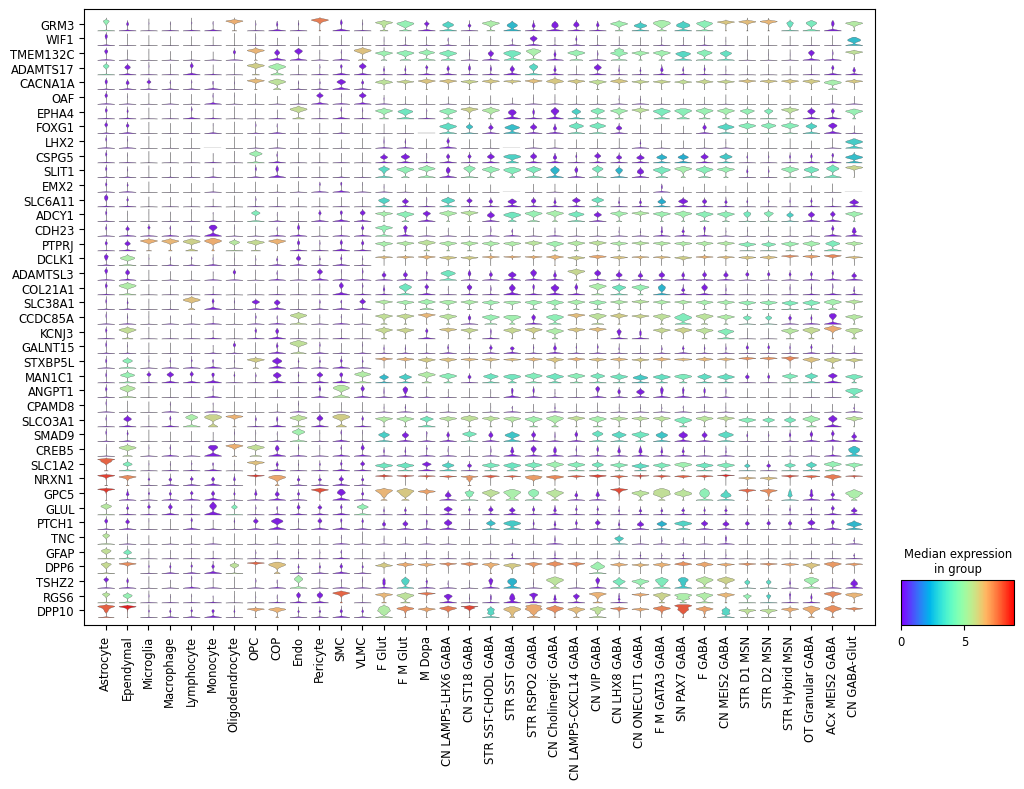

In [6]:
# --- 3) Violin plot for genes of interest
matplotlib.rcParams['pdf.fonttype'] = 42

sc.pl.stacked_violin(
    adata_bg, 
    markers2, 
    groupby='Subclass', 
    use_raw=False, 
    swap_axes=True, 
    figsize=(12,8),
    cmap='rainbow', #Blues
    dendrogram=False,
    save="Violinplot_of_subGroups-Astro-Markers_of_fig2_in_HMBAhumanBGTaxo.pdf"
)

#### filtering DEGs for GO

(759, 8)
Marker gene lists saved by subGroup.


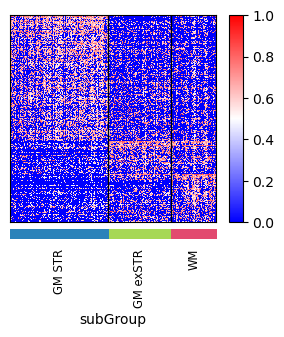

group
GM STR      465
GM exSTR    119
WM          175
Name: names, dtype: int64


In [5]:
markers_df = df_deg[
    (df_deg['pvals_adj'] < 0.01) &                 
    (df_deg['logfoldchanges'] > 1) &  # .abs() 
    (df_deg['pct_nz_group'] > 0.35)  &  # have to set this to ensure the candidates not too sparse!!!
    (df_deg['pct_nz_reference'] < 0.5) &
    (df_deg['pct_nz_group'] - df_deg['pct_nz_reference'] > 0.1) ## looks great when manually checked the list.
]
print(markers_df.shape)

# Group marker genes by subGroup and save each list as a separate txt file
grouped = markers_df.groupby('group')['names']

for group, gene_series in grouped:
    gene_list = gene_series.unique()
    file_path = os.path.join(work_dir, f"marker_genes_{group.replace(' ', '_')}.txt")
    with open(file_path, 'w') as f:
        for gene in gene_list:
            f.write(f"{gene}\n")

print("Marker gene lists saved by subGroup.")

marker_genes = markers_df['names'].tolist()
sc.pl.heatmap(adata, 
              marker_genes, 
              groupby='subGroup', 
              standard_scale='var',
              cmap='bwr',
              use_raw=False, 
              swap_axes=True,
              figsize=(3, 3),             
            #  save="astro_marker_heatmap.pdf" 
) 


print(markers_df.groupby('group')['names'].nunique())


In [6]:
for subGroup, df_sub in markers_df.groupby("group"):
    file_name = f"{subGroup.replace(' ', '_')}_GOdeg_markers.txt"  
    with open(os.path.join(work_dir, file_name), "w") as f:
        for gene in df_sub["names"].unique():
            f.write(gene + "\n")

### Go plots show universe categories + showup or not

### astro_synapse_interactions related genes

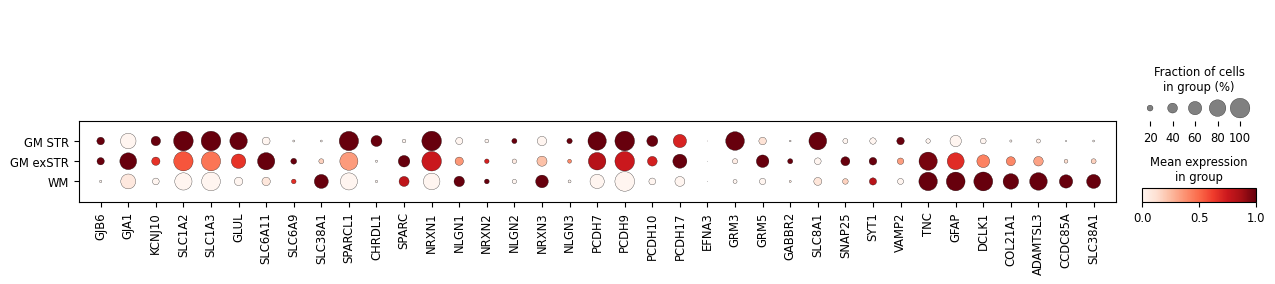

In [4]:
### astro_synapse_interactions related genes

curated_genes_list = ["GJB6", "GJA1", #astro- astro Interactions
                      "KCNJ10", # ionic balance
                      "SLC1A2", "SLC1A3", "GLUL", "SLC6A11", "SLC6A9", "SLC38A1", # neurotransmitter cycling
                      #"THBS1", "THBS2", "GPC4", "GPC6", #synapse formation
                      #"TNF", #homeostatic scaling
                      "SPARCL1", "CHRDL1", "SPARC", #synapse maturation
                      "NRXN1", "NLGN1",  "NRXN2", "NLGN2","NRXN3", "NLGN3",  #cell-adhesion molecules - neuroligin (in Astro); Neurexin in Neurons but actully do also express in astro
                      'PCDH7', 'PCDH9', 'PCDH10', 'PCDH17', #protocadherin
                      "EFNA3", #adhesion EFNA3
                      "GRM3", "GRM5", "GABBR2", "SLC8A1", "SNAP25", "SYT1", "VAMP2",    #GPCRs-Ca2+ flux ##SNAP25, Synaptic vesicle fusion (some astro-like vesicular release) #SYT1, Ca²⁺ sensor for vesicle fusion; VAMP2, Vesicle-associated membrane protein 2
                      "TNC", "GFAP", "DCLK1", "COL21A1", "ADAMTSL3", "CCDC85A", "SLC38A1"] # WM higher #cytosketal+ECM+Glutamine

sc.pl.dotplot(
    adata,
    var_names=curated_genes_list, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'var', #None,#'var',  
    swap_axes=False,
   # cmap="Reds", #Reds, PuRd, coolwarm
   # figsize=(3,9)
)

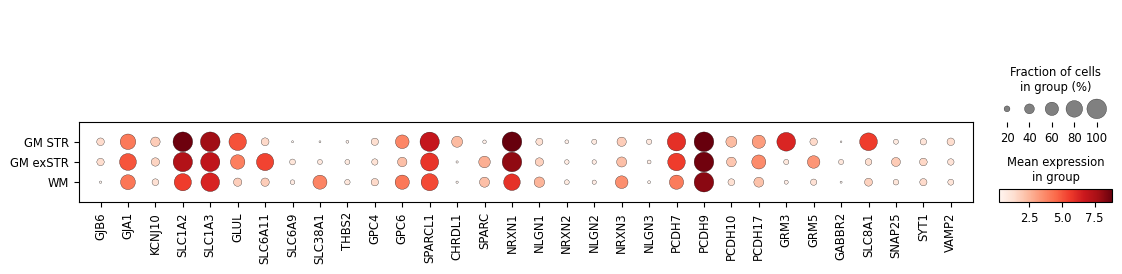

In [21]:
### astro_synapse_interactions related genes

curated_genes_list = ["GJB6", "GJA1", #astro- astro Interactions
                      "KCNJ10", # ionic balance
                      "SLC1A2", "SLC1A3", "GLUL", "SLC6A11", "SLC6A9", "SLC38A1", # neurotransmitter cycling
                      #"THBS1", 
                      "THBS2", "GPC4", "GPC6", #synapse formation
                      #"TNF", #homeostatic scaling
                      "SPARCL1", "CHRDL1", "SPARC", #synapse maturation
                      "NRXN1", "NLGN1",  "NRXN2", "NLGN2","NRXN3", "NLGN3",  #cell-adhesion molecules - neuroligin (in Astro); Neurexin in Neurons but actully do also express in astro
                      'PCDH7', 'PCDH9', 'PCDH10', 'PCDH17', #protocadherin
                      #"EFNA3", #adhesion EFNA3
                      "GRM3", "GRM5", "GABBR2", "SLC8A1", "SNAP25", "SYT1", "VAMP2",    #GPCRs-Ca2+ flux ##SNAP25, Synaptic vesicle fusion (some astro-like vesicular release) #SYT1, Ca²⁺ sensor for vesicle fusion; VAMP2, Vesicle-associated membrane protein 2
                      ] # WM higher #cytosketal+ECM+Glutamine #"TNC", "GFAP", "DCLK1", "COL21A1", "ADAMTSL3", "CCDC85A", "SLC38A1"

sc.pl.dotplot(
    adata,
    var_names=curated_genes_list, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= None, #None,#'var',  
    swap_axes=False,
   # cmap="Reds", #Reds, PuRd, coolwarm
   # figsize=(3,9)
)

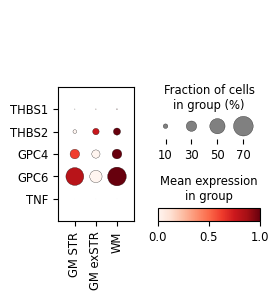

In [6]:
sc.pl.dotplot(
    adata,
    var_names=["THBS1", "THBS2", "GPC4", "GPC6","TNF",], 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'var', #None,#'var',  
    swap_axes=True,
   # cmap="Reds", #Reds, PuRd, coolwarm
   # figsize=(3,9)
)

In [49]:
# highest in GM STR
curated_genes_list_order = [
    'PCDH9', 
    "NRXN1",  #cell-adhesion molecules - neuroligin (in Astro); Neurexin in Neurons but actully do also express in astro
    "SLC1A2", "SLC1A3",  # neurotransmitter cycling
    #"THBS1", "THBS2", "GPC4", "GPC6", #synapse formation
    #"TNF", #homeostatic scaling
    "SPARCL1",  #synapse maturation
    'PCDH7',  "GJA1", #astro- astro Interactions
    "GLUL", 'PCDH17',   #protocadherin
    #"EFNA3", #adhesion EFNA3
    "GRM3",  "SLC8A1",   #GPCRs-Ca2+ flux ##SNAP25, Synaptic vesicle fusion (some astro-like vesicular release) #SYT1, Ca²⁺ sensor for vesicle fusion; VAMP2, Vesicle-associated membrane protein 2
    # WM higher #cytosketal+ECM+Glutamine #"TNC", "GFAP", "DCLK1", "COL21A1", "ADAMTSL3", "CCDC85A"
    "SLC6A11",  # neurotransmitter cycling
    "GRM5",  
    #highest in WM
    "GPC6", #synapse formation
    "SLC38A1", # neurotransmitter cycling
    "NRXN3",  "NLGN1","NRXN2", #cell-adhesion molecules - neuroligin (in Astro); Neurexin in Neurons but actully do also express in astro
    "SPARC", #synapse maturation
    "GABBR2", "SNAP25", "SYT1",  #GPCRs-Ca2+ flux ##SNAP25, Synaptic vesicle fusion (some astro-like vesicular release) #SYT1, Ca²⁺ sensor for vesicle fusion; VAMP2, Vesicle-associated membrane protein 2
    #all low level
    "KCNJ10", # ionic balance
    "GJB6",  #astro- astro Interactions 
    'PCDH10', 
    "NLGN2", "NLGN3","CHRDL1",
     "VAMP2",  "SLC6A9",
     "THBS2", "GPC4", 
    
]
 

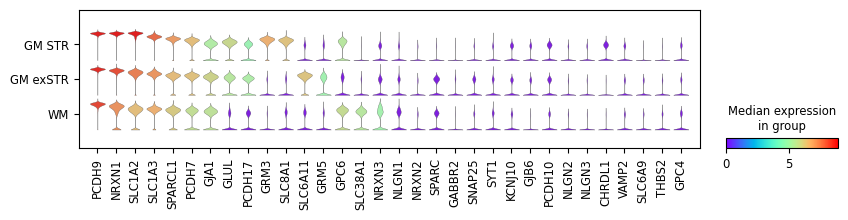

In [55]:
sc.pl.stacked_violin(
    adata, 
    curated_genes_list_order, 
    groupby='subGroup', 
    use_raw=False, 
    swap_axes=False, 
    figsize=(9.8,1.8),
    cmap='rainbow', #Blues
    dendrogram=False,
    save="Violinplot_of_subGroups-Astro-Markers_of_fig2Supp_in_synapse-astro-interaction.pdf"
)

In [5]:
# Glutamate receptors and transporters
glutamate_genes = [
    "SLC1A1", "SLC1A2", "SLC1A3",                # EAAT1–3
    "SLC1A6", "SLC1A7",                          # EAAT4–5
    "SLC17A6", "SLC17A7", "SLC17A8",              # VGLUT1–3
    "GRIA1", "GRIA2", "GRIA3", "GRIA4",         # AMPA receptors
    "GRIN1", "GRIN2A", "GRIN2B", "GRIN2C",      # NMDA receptors
    "GRIN2D", "GRIN3A", "GRIN3B",
    "GRIK1", "GRIK2", "GRIK3", "GRIK4", "GRIK5", # Kainate receptors
    "GRM1", "GRM2", "GRM3", "GRM4", "GRM5",      # mGluRs
    "GRM6", "GRM7", "GRM8",
]

# GABA receptors and transporters
gaba_genes = [
    "SLC6A1", "SLC6A11", "SLC6A12", "SLC6A13",                  # /, GAT3, BGT-1, GAT2
    "SLC32A1",                                                   # VGAT
    "GABRA1", "GABRA2", "GABRA3", "GABRA4", "GABRA5", "GABRA6",  # GABA_A α subunits
    "GABRB1", "GABRB2", "GABRB3",                               # GABA_A β subunits
    "GABRG1", "GABRG2", "GABRG3",                     # GABA_A γ subunits "GABRG4", 
    "GABRD", "GABRE", "GABRQ", "GABRP",                         # GABA_A δ, ε, θ, π subunits
    "GABRR1", "GABRR2", "GABRR3",                               # GABA_A ρ subunits
    "GABBR1", "GABBR2",                                         # GABA_B receptors
]

dopa_genes = ['SLC6A3', 'SLC18A1', 'SLC18A2', 'DRD1', 'DRD2', 'DRD3', 'DRD4', 'DRD5']


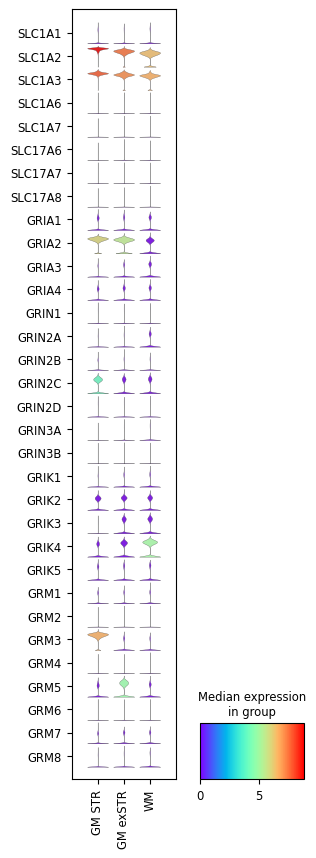

In [6]:
sc.pl.stacked_violin(
    adata, 
    glutamate_genes,  #+ dopa_genes, 
    groupby='subGroup', 
    use_raw=False, 
    swap_axes=True, 
    figsize=(3,10),
    cmap='rainbow', #Blues
    dendrogram=False,
    save="Violinplot_of_subGroups-Astro-Markers_of_fig2_Glut-related-genes.pdf"
)

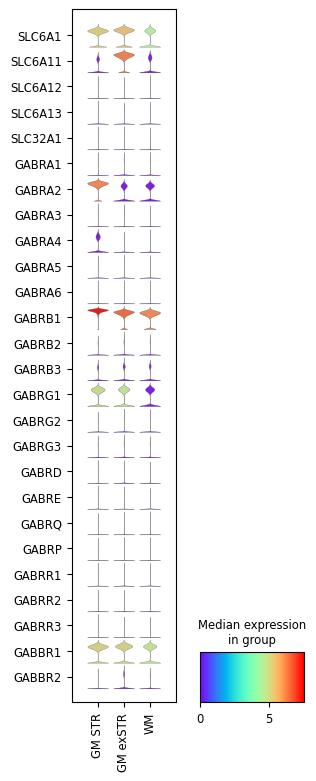

In [7]:
sc.pl.stacked_violin(
    adata, 
    gaba_genes,  #+ dopa_genes, 
    groupby='subGroup', 
    use_raw=False, 
    swap_axes=True, 
    figsize=(3,9),
    cmap='rainbow', #Blues
    dendrogram=False,
    save="Violinplot_of_subGroups-Astro-Markers_of_fig2_GABA-related-genes.pdf"
)

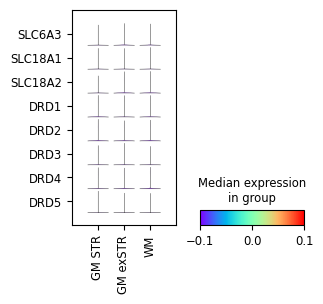

In [8]:
sc.pl.stacked_violin(
    adata, 
    dopa_genes,  #+ dopa_genes, 
    groupby='subGroup', 
    use_raw=False, 
    swap_axes=True, 
    figsize=(3,2.8),
    cmap='rainbow', #Blues
    dendrogram=False,
    save="Violinplot_of_subGroups-Astro-Markers_of_fig2_dopa-related-genes.pdf"
)

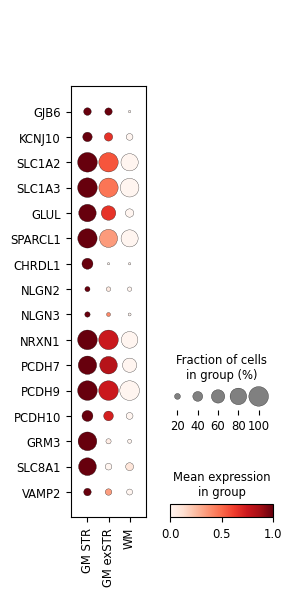

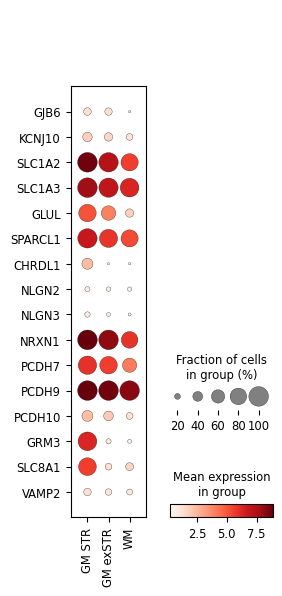

In [14]:
sc.pl.dotplot(
    adata,
    var_names=curated_genes_list_gmstr, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'var', #None,#'var',  
    swap_axes=True,
   # cmap="Reds", #Reds, PuRd, coolwarm
   # figsize=(3,9)
)

sc.pl.dotplot(
    adata,
    var_names=curated_genes_list_gmstr, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= None, #None,#'var',  
    swap_axes=True,
   # cmap="Reds", #Reds, PuRd, coolwarm
   # figsize=(3,9)
)

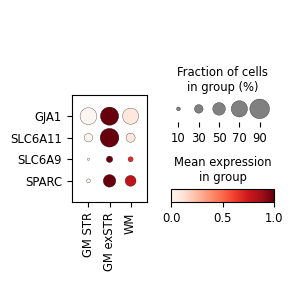

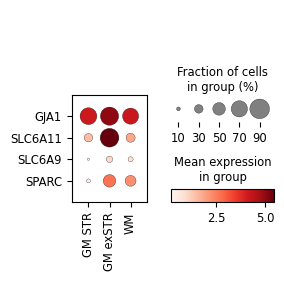

In [16]:
sc.pl.dotplot(
    adata,
    var_names=curated_genes_list_exgmstr, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'var', #None,#'var',  
    swap_axes=True,
   # cmap="Reds", #Reds, PuRd, coolwarm
   # figsize=(3,9)
)

sc.pl.dotplot(
    adata,
    var_names=curated_genes_list_exgmstr, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'None', #None,#'var',  
    swap_axes=True,
   # cmap="Reds", #Reds, PuRd, coolwarm
   # figsize=(3,9)
)

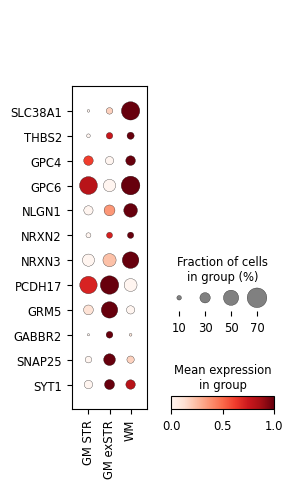

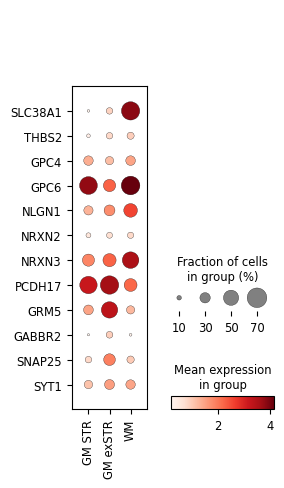

In [17]:
sc.pl.dotplot(
    adata,
    var_names=curated_genes_list_wm, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'var', #None,#'var',  
    swap_axes=True,
   # cmap="Reds", #Reds, PuRd, coolwarm
   # figsize=(3,9)
)

sc.pl.dotplot(
    adata,
    var_names=curated_genes_list_wm, 
    groupby="subGroup", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'None', #None,#'var',  
    swap_axes=True,
   # cmap="Reds", #Reds, PuRd, coolwarm
   # figsize=(3,9)
)

### DRD1-5 in GM STR clusters

In [3]:
adata_21

AnnData object with n_obs × n_vars = 136684 × 36601
    obs: 'Neighborhood', 'Class', 'Subclass', 'Group', 'Cluster', 'cluster_id', 'cell_type_ontology_term', 'load_id', 'donor_id', 'assay', 'assay_ontology_term_id', 'organism', 'organism_ontology_term_id', 'development_stage', 'anatomical_region', 'anatomical_region_merged', 'anatomical_region_ontology_term_id', 'brain_region_ontology_term_id', 'self_reported_sex', 'self_reported_sex_ontology_term_id', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'disease', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'atac_confidently_mapped_read_pairs', 'atac_fraction_of_genome_in_peaks', 'atac_fraction_of_high_quality_fragments_in_cells', 'atac_fraction_of_high_quality_fragments_overlapping_tss', 'atac_fraction_of_high_quality_fragments_overlapping_peaks', 'atac_fraction_of_transposition_events_in_peaks_in_cells', 'atac_mean_raw_read_pairs_per_cell', 'atac_median_high_quality_fragments_per_cell', 'atac

In [4]:
adata = adata_21[adata_21.obs['Cluster'].isin(['Human-7', 'Human-14', 'Human-31'])].copy()

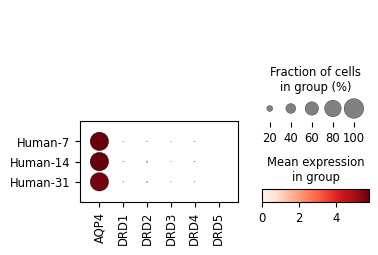

In [6]:
markers =['AQP4','DRD1', 'DRD2', 'DRD3', 'DRD4', 'DRD5']

sc.pl.dotplot(
    adata,
    var_names=markers, 
    groupby="Cluster", 
    use_raw=False,
    dendrogram=False,
    standard_scale= 'None',#'var',#'None',  
    swap_axes=False,
   # figsize=(3, 2),
    save="Dotplot_Astro_DopaReceptors_GMSTR3clusters.pdf"
)
